In [2566]:
import math
import numpy as np
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set()
sns.set_style("ticks")
sns.set_context("paper")
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2567]:
three_d_points = np.array([
    [-0.08, -2.30333333, 1.19666667],  # Top right solar panel
    [-0.15666667, -0.84333333, 1.19666667],  # Top left solar panel
    [-0.08, -2.30333333, -0.78333333],  # Bottom right solar panel
    [-0.15666667, -0.84333333, -0.78333333],  # Bottom left solar panel
    [-0.24333333, 1.03, -0.65333333],  # Bottom left satellite
])

three_d_points_names = [
    'Top right solar panel',
    'Top left solar panel',
    'Bottom right solar panel',
    'Bottom left solar panel',
    'Bottom left satellite'
]


def get_normalized_rotation(roll, pitch, yaw):
    roll_rotation_axis = -19.4321
    pitch_rotation_axis = 0
    yaw_rotation_axis = 179.9654
    r_roll_rotation_axis = np.array([[1, 0, 0],
                                     [0, math.cos(roll_rotation_axis / 180 * math.pi),
                                      -math.sin(roll_rotation_axis / 180 * math.pi)],
                                     [0, math.sin(roll_rotation_axis / 180 * math.pi),
                                      math.cos(roll_rotation_axis / 180 * math.pi)]])

    r_pitch_rotation_axis = np.array(
        [[math.cos(pitch_rotation_axis / 180 * math.pi), 0, math.sin(pitch_rotation_axis / 180 * math.pi)],
         [0, 1, 0],
         [-math.sin(pitch_rotation_axis / 180 * math.pi), 0, math.cos(pitch_rotation_axis / 180 * math.pi)]])

    r_yaw_rotation_axis = np.array(
        [[math.cos(yaw_rotation_axis / 180 * math.pi), -math.sin(yaw_rotation_axis / 180 * math.pi), 0],
         [math.sin(yaw_rotation_axis / 180 * math.pi), math.cos(yaw_rotation_axis / 180 * math.pi), 0],
         [0, 0, 1]])

    rotation_matrix_rotation_axis = r_yaw_rotation_axis @ r_pitch_rotation_axis @ r_roll_rotation_axis

    r_roll = np.array([[1, 0, 0],
                       [0, math.cos(roll / 180 * math.pi), -math.sin(roll / 180 * math.pi)],
                       [0, math.sin(roll / 180 * math.pi), math.cos(roll / 180 * math.pi)]])

    r_pitch = np.array([[math.cos(pitch / 180 * math.pi), 0, math.sin(pitch / 180 * math.pi)],
                        [0, 1, 0],
                        [-math.sin(pitch / 180 * math.pi), 0, math.cos(pitch / 180 * math.pi)]])

    r_yaw = np.array([[math.cos(yaw / 180 * math.pi), -math.sin(yaw / 180 * math.pi), 0],
                      [math.sin(yaw / 180 * math.pi), math.cos(yaw / 180 * math.pi), 0],
                      [0, 0, 1]])

    rotation_matrix = (r_yaw @ r_pitch @ r_roll)

    roll = np.rad2deg(math.atan2(rotation_matrix[2, 1], rotation_matrix[2, 2]))
    pitch = np.rad2deg(
        math.atan2(-rotation_matrix[2, 0],
                   math.sqrt(rotation_matrix[2, 1] ** 2 + rotation_matrix[2, 2] ** 2)))
    yaw = np.rad2deg(
        math.atan2(rotation_matrix[1, 0], rotation_matrix[0, 0]))

    return roll, pitch, yaw


def get_rotated_point(roll, pitch, yaw, point=None):
    if point is None:
        point = [-0.08, -2.30333333, 1.19666667]

    r_roll = np.array([[1, 0, 0],
                       [0, math.cos(roll / 180 * math.pi), -math.sin(roll / 180 * math.pi)],
                       [0, math.sin(roll / 180 * math.pi), math.cos(roll / 180 * math.pi)]])

    r_pitch = np.array([[math.cos(pitch / 180 * math.pi), 0, math.sin(pitch / 180 * math.pi)],
                        [0, 1, 0],
                        [-math.sin(pitch / 180 * math.pi), 0, math.cos(pitch / 180 * math.pi)]])

    r_yaw = np.array([[math.cos(yaw / 180 * math.pi), -math.sin(yaw / 180 * math.pi), 0],
                      [math.sin(yaw / 180 * math.pi), math.cos(yaw / 180 * math.pi), 0],
                      [0, 0, 1]])

    rotation_matrix = r_yaw @ r_pitch @ r_roll

    rotated_3d_points = np.dot(rotation_matrix, point)

    return rotated_3d_points

In [2568]:
folder = "../test_images/dynamic_unknowndeg_0to360_5degstep/"
suffix = '_eps2_final_strict'
colors = ['red', 'green', 'blue']
normalize = True

In [2569]:
df_true = pd.read_csv(folder + "real_scores.csv")
df_true = df_true.rename(columns={'real_roll': 'roll', 'real_pitch': 'pitch', 'real_yaw':
    'yaw'})
if normalize:
    df_true['roll'], df_true['pitch'], df_true['yaw'] = np.vectorize(get_normalized_rotation)(df_true['roll'],
                                                                                              df_true['pitch'],
                                                                                              df_true['yaw'])
df_true['img_number'] = df_true.index
# drop first image
df_true = df_true.drop(df_true.index[0])

In [2570]:
df_guess = pd.read_csv(folder + "guesses" + suffix + ".csv")
# drop first image
df_guess = df_guess.drop(df_guess.index[0])
# if normalize:
#     df_guess['roll'], df_guess['pitch'], df_guess['yaw'] = np.vectorize(get_normalized_rotation)(df_guess['roll'],
#                                                                                                  df_guess['pitch'],
#                                                                                                  df_guess['yaw'])
#     df_guess['roll_min'], df_guess['pitch_min'], df_guess['yaw_min'] = np.vectorize(get_normalized_rotation)(
#         df_guess['roll_min'],
#         df_guess['pitch_min'],
#         df_guess['yaw_min'])
#     df_guess['roll_max'], df_guess['pitch_max'], df_guess['yaw_max'] = np.vectorize(get_normalized_rotation)(
#         df_guess['roll_max'],
#         df_guess['pitch_max'],
#         df_guess['yaw_max'])

In [2571]:
df = pd.read_csv(folder + "fine_scores" + suffix + ".csv")
# drop first image
df = df.drop(df.index[0])
if normalize:
    df['roll'], df['pitch'], df['yaw'] = np.vectorize(get_normalized_rotation)(df['roll'],
                                                                               df['pitch'],
                                                                               df['yaw'])

In [2572]:
df_rough = pd.read_csv(folder + "best_scores.csv")
# drop first image
df_rough = df_rough.drop(df_rough.index[0])
df_rough['img_number'] = df_rough['file_name']
if normalize:
    df_rough['roll'], df_rough['pitch'], df_rough['yaw'] = np.vectorize(get_normalized_rotation)(df_rough['roll'],
                                                                                                 df_rough['pitch'],
                                                                                                 df_rough['yaw'])

<Axes: xlabel='img_number', ylabel='x'>

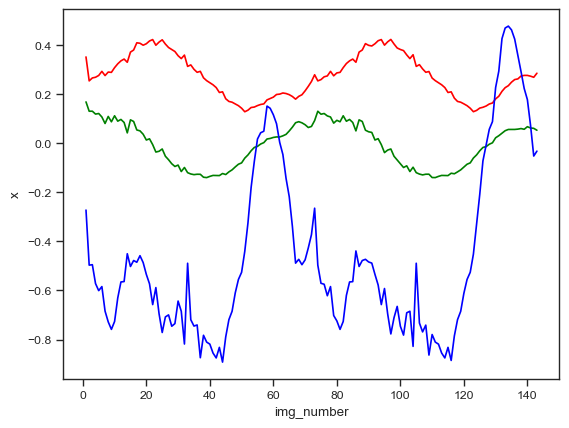

In [2573]:
sns.lineplot(df, x='img_number', y='x', ci=None, color='red')
sns.lineplot(df, x='img_number', y='y', ci=None, color='green')
sns.lineplot(df, x='img_number', y='z', ci=None, color='blue')


In [2574]:
def plot_guess(guess_type, df=df_guess):
    sns.lineplot(data=df, x='img_number', y=guess_type, color='blue', ci=None)
    sns.lineplot(data=df, x='img_number', y=guess_type + '_min', color='red', ci=None)
    sns.lineplot(data=df, x='img_number', y=guess_type + '_max', color='green', ci=None)
    sns.scatterplot(data=df, x='img_number', y=guess_type, color='black')
    plt.legend(['Guess', 'Min', 'Max', 'Lowest loss estimate'])
    plt.title('SMA ' + guess_type + ' guesses')
    plt.xlabel('Image number')
    if guess_type in ['roll', 'pitch', 'yaw']:
        plt.ylabel(guess_type + ' (deg)')

    else:
        plt.ylabel(guess_type + ' (m)')

    plt.savefig(folder + "/plots/" + guess_type + '_guesses' + suffix + '.png')
    plt.show()

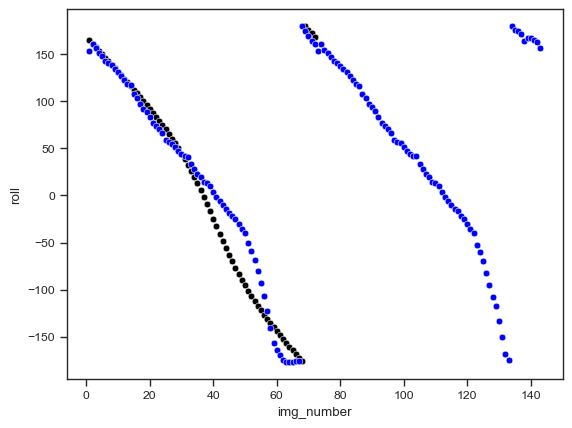

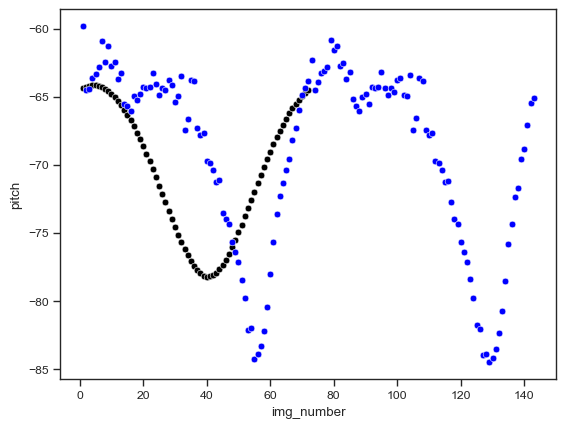

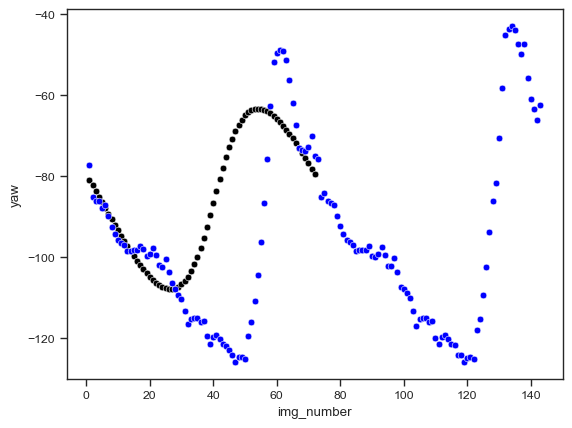

In [2575]:
for guess_type in ['roll', 'pitch', 'yaw']:
    sns.scatterplot(data=df_true, x='img_number', y=guess_type, color='black')
    sns.scatterplot(data=df, x='img_number', y=guess_type, color='blue')
    # sns.scatterplot(data=df_rough, x='img_number', y=guess_type, color='green')
    plt.show()

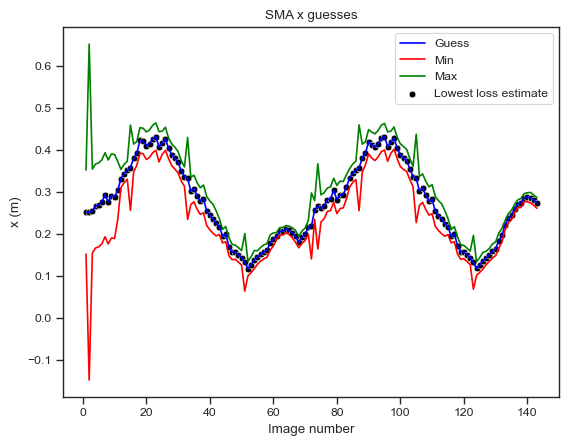

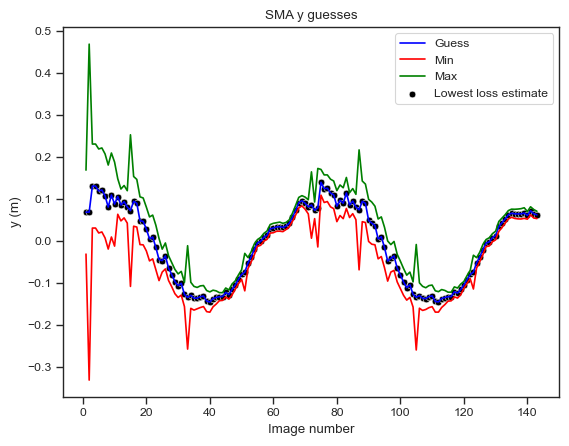

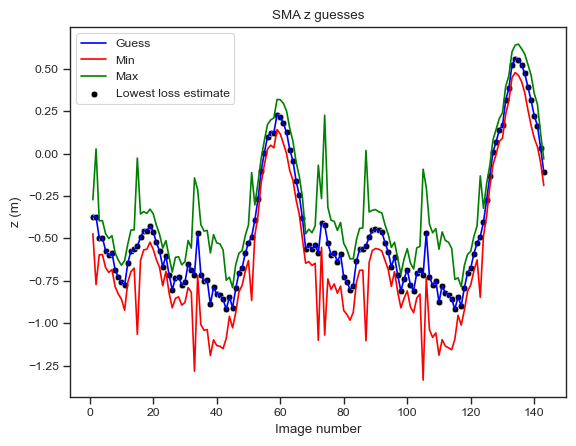

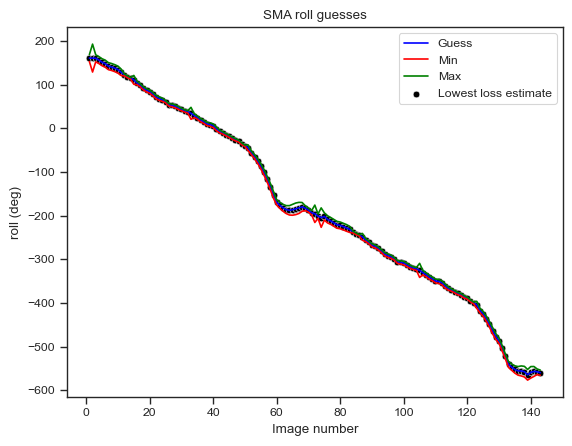

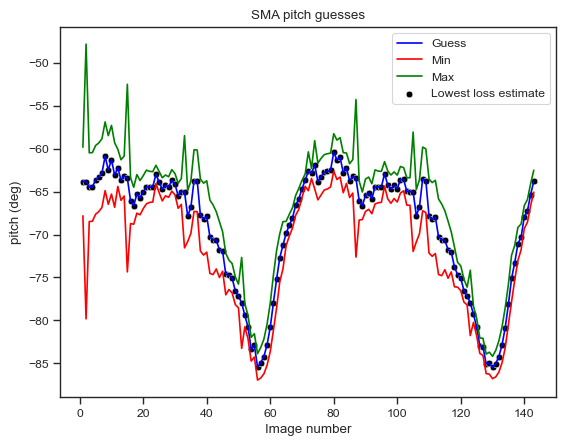

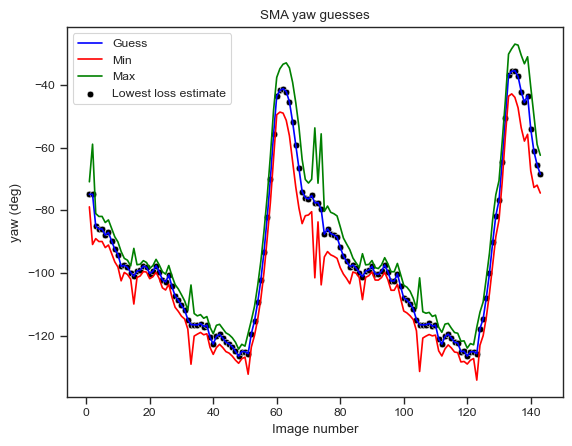

In [2576]:
for guess_type in ['x', 'y', 'z', 'roll', 'pitch', 'yaw']:
    plot_guess(guess_type)

In [2577]:
def plot_translation(trans_type):
    sns.scatterplot(data=df, x='img_number', y=trans_type, color='black')
    mean = df[trans_type].mean()
    plt.axhline(mean, color='red', linestyle='dashed', linewidth=1)
    std = df[trans_type].std()
    plt.axhline(mean + std, color='green', linestyle='dashed', linewidth=1)
    plt.axhline(mean - std, color='green', linestyle='dashed', linewidth=1)
    plt.title(trans_type + ' estimates for CoM')
    plt.xlabel('Image number')
    plt.ylabel(trans_type + ' (m)')
    plt.legend([trans_type + ' estimates', 'Mean', 'Standard deviation'])
    plt.show()

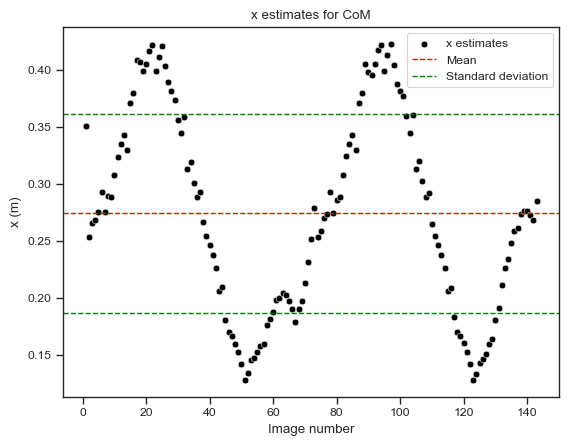

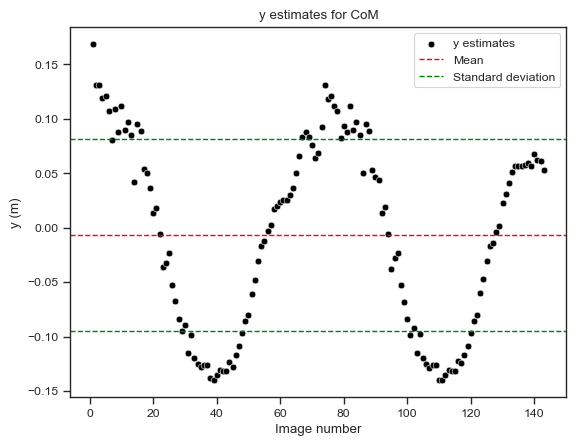

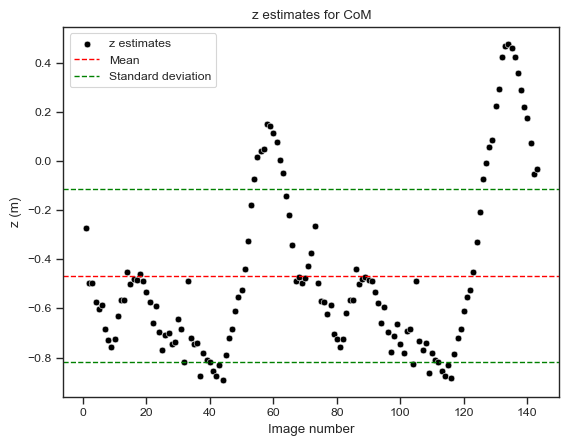

In [2578]:
for i in ['x', 'y', 'z']:
    plot_translation(i)

In [2579]:
df_rotated_points_true = pd.DataFrame()
for i, point in enumerate(three_d_points):
    df_local = df_true.apply(
        lambda row: get_rotated_point(row['roll'], row['pitch'], row['yaw'], point),
        axis=1, result_type='expand').rename(columns={0: 'x_point', 1: 'y_point', 2: 'z_point'})
    df_local['img_number'] = df_true['img_number']
    df_local['3d_point'] = three_d_points_names[i]
    df_rotated_points_true = pd.concat([df_local, df_rotated_points_true])

In [2580]:
df_rotated_points_true = df_rotated_points_true.merge(df_true, on='img_number')

In [2581]:
df_rotated_points = pd.DataFrame()
for i, point in enumerate(three_d_points):
    df_local = df.apply(
        lambda row: get_rotated_point(row['roll'], row['pitch'], row['yaw'], point),
        axis=1, result_type='expand').rename(columns={0: 'x_point', 1: 'y_point', 2: 'z_point'})
    df_local['img_number'] = df['img_number']
    df_local['3d_point'] = three_d_points_names[i]
    df_rotated_points = pd.concat([df_local, df_rotated_points])
df_rotated_points.to_csv(folder + 'rotated_points.csv')

In [2582]:
df_rotated_points = df_rotated_points.merge(df, on='img_number')

In [2583]:
df_rotated_points_rough = pd.DataFrame()
for i, point in enumerate(three_d_points):
    df_local = df_rough.apply(
        lambda row: get_rotated_point(row['roll'], row['pitch'], row['yaw'], point),
        axis=1, result_type='expand').rename(columns={0: 'x_point', 1: 'y_point', 2: 'z_point'})
    df_local['img_number'] = df_rough['img_number']
    df_local['3d_point'] = three_d_points_names[i]
    df_rotated_points_rough = pd.concat([df_local, df_rotated_points_rough])

In [2584]:
df_rotated_points_rough = df_rotated_points_rough.merge(df_rough, on='img_number')

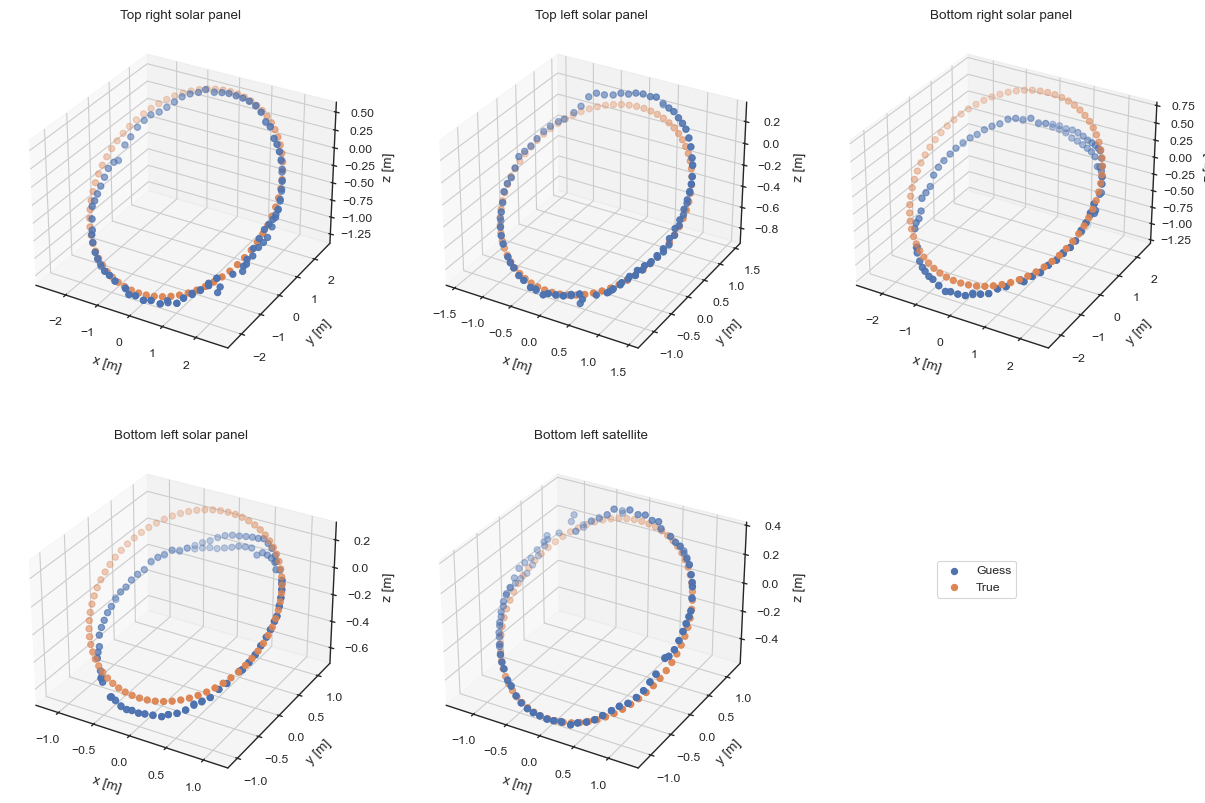

In [2585]:
# 3d subplots
fig = plt.figure(figsize=(15, 10))
for i, point in enumerate(three_d_points):
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.title.set_text(three_d_points_names[i])
    # labels
    ax.set_xlabel('x [m]')
    ax.set_ylabel('y [m]')
    ax.set_zlabel('z [m]')
    ax.scatter(df_rotated_points[df_rotated_points['3d_point'] == three_d_points_names[i]]['x_point'],
               df_rotated_points[df_rotated_points['3d_point'] == three_d_points_names[i]]['y_point'],
               df_rotated_points[df_rotated_points['3d_point'] == three_d_points_names[i]]['z_point'],
               label=three_d_points_names[i])
    ax.scatter(df_rotated_points_true[df_rotated_points_true['3d_point'] == three_d_points_names[i]]['x_point'],
               df_rotated_points_true[df_rotated_points_true['3d_point'] == three_d_points_names[i]]['y_point'],
               df_rotated_points_true[df_rotated_points_true['3d_point'] == three_d_points_names[i]]['z_point'],
               label=three_d_points_names[i] + ' true')

# add legend bottom right in the figure
fig.legend(['Guess', 'True'], loc='lower right', bbox_to_anchor=(0.8, 0.3))
plt.savefig(folder + "/plots/3d_points.png")

In [2586]:
df_rotated_points_all = df_rotated_points.merge(df_rotated_points_true, on=['img_number', '3d_point'],
                                                suffixes=('_fine', '_true'))

In [2587]:
df_rotated_points_all

,x_point_fine,y_point_fine,z_point_fine,img_number,3d_point,iterations,loss,roll_fine,pitch_fine,yaw_fine,x,y,z,x_point_true,y_point_true,z_point_true,roll_true,pitch_true,yaw_true
0,1.004349,0.562966,0.470435,1,Bottom left satellite,1092,1.136198e+03,-172.702197,59.806348,102.893767,0.351719,0.16847,-0.272503,0.876596,0.701908,0.534658,175.679851,64.379949,99.232799
1,-0.871352,0.503637,0.580054,1,Bottom left solar panel,1092,1.136198e+03,-172.702197,59.806348,102.893767,0.351719,0.16847,-0.272503,-0.981230,0.427388,0.451546,175.679851,64.379949,99.232799
2,-2.327383,0.374327,0.607060,1,Bottom right solar panel,1092,1.136198e+03,-172.702197,59.806348,102.893767,0.351719,0.16847,-0.272503,-2.407629,0.128640,0.334861,175.679851,64.379949,99.232799
3,-0.737733,-1.207196,-0.407669,1,Top left solar panel,1092,1.136198e+03,-172.702197,59.806348,102.893767,0.351719,0.16847,-0.272503,-0.548375,-1.305874,-0.402176,175.679851,64.379949,99.232799
4,-2.193765,-1.336506,-0.380663,1,Top right solar panel,1092,1.136198e+03,-172.702197,59.806348,102.893767,0.351719,0.16847,-0.272503,-1.974773,-1.604621,-0.518861,175.679851,64.379949,99.232799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.858721,0.739777,0.512136,72,Bottom left satellite,469,1.203587e-11,179.311311,63.810797,105.133391,0.251719,0.06847,-0.372504,0.800404,0.770019,0.559804,171.959137,64.533187,100.608902
356,-0.986187,0.380358,0.481799,72,Bottom left solar panel,469,1.203587e-11,179.311311,63.810797,105.133391,0.251719,0.06847,-0.372504,-1.025380,0.343495,0.424233,171.959137,64.533187,100.608902
357,-2.400176,0.016689,0.405258,72,Bottom right solar panel,469,1.203587e-11,179.311311,63.810797,105.133391,0.251719,0.06847,-0.372504,-2.418439,-0.071481,0.267202,171.959137,64.533187,100.608902
358,-0.499400,-1.328426,-0.391985,72,Top left solar panel,469,1.203587e-11,179.311311,63.810797,105.133391,0.251719,0.06847,-0.372504,-0.427282,-1.345298,-0.418773,171.959137,64.533187,100.608902


,x_point_fine,y_point_fine,z_point_fine,img_number,3d_point,iterations,loss,roll_fine,pitch_fine,yaw_fine,x,y,z,x_point_true,y_point_true,z_point_true,roll_true,pitch_true,yaw_true
0,-0.839418,0.861830,0.315567,1,Bottom left satellite,1092,1.136198e+03,153.323235,-59.821897,-77.167708,0.351719,0.16847,-0.272503,-0.960254,0.772240,0.168858,164.95773,-64.388949,-80.844477
1,0.998456,0.593102,0.026096,1,Bottom left solar panel,1092,1.136198e+03,153.323235,-59.821897,-77.167708,0.351719,0.16847,-0.272503,0.916856,0.707417,0.091118,164.95773,-64.388949,-80.844477
2,2.404870,0.292786,-0.237129,1,Bottom right solar panel,1092,1.136198e+03,153.323235,-59.821897,-77.167708,0.351719,0.16847,-0.272503,2.368506,0.561713,-0.003538,164.95773,-64.388949,-80.844477
3,0.471411,-1.095575,-0.863280,1,Top left solar panel,1092,1.136198e+03,153.323235,-59.821897,-77.167708,0.351719,0.16847,-0.272503,0.683889,-1.076664,-0.735430,164.95773,-64.388949,-80.844477
4,1.877825,-1.395892,-1.126506,1,Top right solar panel,1092,1.136198e+03,153.323235,-59.821897,-77.167708,0.351719,0.16847,-0.272503,2.135540,-1.222368,-0.830086,164.95773,-64.388949,-80.844477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-0.989330,0.726710,0.200186,72,Bottom left satellite,469,1.203587e-11,161.323238,-63.821896,-74.940878,0.251719,0.06847,-0.372504,-1.025053,0.689846,0.142602,168.68000,-64.540000,-79.470000
356,0.885702,0.748548,0.067642,72,Bottom left solar panel,469,1.203587e-11,161.323238,-63.821896,-74.940878,0.251719,0.06847,-0.372504,0.852440,0.780314,0.117576,168.68000,-64.540000,-79.470000
357,2.339120,0.670073,-0.069814,72,Bottom right solar panel,469,1.203587e-11,161.323238,-63.821896,-74.940878,0.251719,0.06847,-0.372504,2.313238,0.755143,0.063602,168.68000,-64.540000,-79.470000
358,0.710780,-1.041715,-0.759862,72,Top left solar panel,469,1.203587e-11,161.323238,-63.821896,-74.940878,0.251719,0.06847,-0.372504,0.790683,-1.014128,-0.717030,168.68000,-64.540000,-79.470000


In [2588]:
# df_rotated_points_all['residual_roll'] = df_rotated_points_all['roll_fine'] - df_rotated_points_all['roll_true']
# signed delta angle
df_rotated_points_all['residual_roll'] = np.vectorize(min)(
    df_rotated_points_all['roll_fine'] - df_rotated_points_all['roll_true'],
    (df_rotated_points_all['roll_true'] + 360) -
    df_rotated_points_all['roll_fine'])
df_rotated_points_all['residual_pitch'] = np.vectorize(min)(
    df_rotated_points_all['pitch_fine'] - df_rotated_points_all['pitch_true'],
    (df_rotated_points_all['pitch_true'] + 360) -
    df_rotated_points_all['pitch_fine'])
df_rotated_points_all['residual_yaw'] = np.vectorize(min)(
    df_rotated_points_all['yaw_fine'] - df_rotated_points_all['yaw_true'],
    (df_rotated_points_all['yaw_true'] + 360) -
    df_rotated_points_all['yaw_fine'])
df_rotated_points_all['residual_x'] = df_rotated_points_all['x_point_fine'] - df_rotated_points_all['x_point_true']
df_rotated_points_all['residual_y'] = df_rotated_points_all['y_point_fine'] - df_rotated_points_all['y_point_true']
df_rotated_points_all['residual_z'] = df_rotated_points_all['z_point_fine'] - df_rotated_points_all['z_point_true']

In [2589]:
# for var in ['x', 'y', 'z']:
#     g = sns.displot(data=df_rotated_points_all, x='residual_' + var, hue='3d_point', kind='kde');
#     g.fig.subplots_adjust(top=0.9)
#     g.fig.suptitle('Residuals for rotated ' + var + ' point')
#     for ax in g.axes.flat:
#         ax.set(xlabel='Independent variable ' + var + ' [m]')

In [2590]:
df_rotated_points_all

,x_point_fine,y_point_fine,z_point_fine,img_number,3d_point,iterations,loss,roll_fine,pitch_fine,yaw_fine,...,z_point_true,roll_true,pitch_true,yaw_true,residual_roll,residual_pitch,residual_yaw,residual_x,residual_y,residual_z
0,1.004349,0.562966,0.470435,1,Bottom left satellite,1092,1.136198e+03,-172.702197,59.806348,102.893767,...,0.534658,175.679851,64.379949,99.232799,-348.382048,-4.573601,3.660967,0.127752,-0.138942,-0.064224
1,-0.871352,0.503637,0.580054,1,Bottom left solar panel,1092,1.136198e+03,-172.702197,59.806348,102.893767,...,0.451546,175.679851,64.379949,99.232799,-348.382048,-4.573601,3.660967,0.109878,0.076249,0.128508
2,-2.327383,0.374327,0.607060,1,Bottom right solar panel,1092,1.136198e+03,-172.702197,59.806348,102.893767,...,0.334861,175.679851,64.379949,99.232799,-348.382048,-4.573601,3.660967,0.080245,0.245687,0.272199
3,-0.737733,-1.207196,-0.407669,1,Top left solar panel,1092,1.136198e+03,-172.702197,59.806348,102.893767,...,-0.402176,175.679851,64.379949,99.232799,-348.382048,-4.573601,3.660967,-0.189358,0.098678,-0.005493
4,-2.193765,-1.336506,-0.380663,1,Top right solar panel,1092,1.136198e+03,-172.702197,59.806348,102.893767,...,-0.518861,175.679851,64.379949,99.232799,-348.382048,-4.573601,3.660967,-0.218991,0.268115,0.138198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.858721,0.739777,0.512136,72,Bottom left satellite,469,1.203587e-11,179.311311,63.810797,105.133391,...,0.559804,171.959137,64.533187,100.608902,7.352173,-0.722390,4.524489,0.058317,-0.030242,-0.047668
356,-0.986187,0.380358,0.481799,72,Bottom left solar panel,469,1.203587e-11,179.311311,63.810797,105.133391,...,0.424233,171.959137,64.533187,100.608902,7.352173,-0.722390,4.524489,0.039193,0.036863,0.057566
357,-2.400176,0.016689,0.405258,72,Bottom right solar panel,469,1.203587e-11,179.311311,63.810797,105.133391,...,0.267202,171.959137,64.533187,100.608902,7.352173,-0.722390,4.524489,0.018264,0.088170,0.138056
358,-0.499400,-1.328426,-0.391985,72,Top left solar panel,469,1.203587e-11,179.311311,63.810797,105.133391,...,-0.418773,171.959137,64.533187,100.608902,7.352173,-0.722390,4.524489,-0.072117,0.016872,0.026788


,x_point_fine,y_point_fine,z_point_fine,img_number,3d_point,iterations,loss,roll_fine,pitch_fine,yaw_fine,...,z_point_true,roll_true,pitch_true,yaw_true,residual_roll,residual_pitch,residual_yaw,residual_x,residual_y,residual_z
0,-0.839418,0.861830,0.315567,1,Bottom left satellite,1092,1.136198e+03,153.323235,-59.821897,-77.167708,...,0.168858,164.95773,-64.388949,-80.844477,-11.634495,4.567052,3.676769,0.120837,0.089590,0.146709
1,0.998456,0.593102,0.026096,1,Bottom left solar panel,1092,1.136198e+03,153.323235,-59.821897,-77.167708,...,0.091118,164.95773,-64.388949,-80.844477,-11.634495,4.567052,3.676769,0.081600,-0.114315,-0.065021
2,2.404870,0.292786,-0.237129,1,Bottom right solar panel,1092,1.136198e+03,153.323235,-59.821897,-77.167708,...,-0.003538,164.95773,-64.388949,-80.844477,-11.634495,4.567052,3.676769,0.036364,-0.268927,-0.233591
3,0.471411,-1.095575,-0.863280,1,Top left solar panel,1092,1.136198e+03,153.323235,-59.821897,-77.167708,...,-0.735430,164.95773,-64.388949,-80.844477,-11.634495,4.567052,3.676769,-0.212478,-0.018911,-0.127851
4,1.877825,-1.395892,-1.126506,1,Top right solar panel,1092,1.136198e+03,153.323235,-59.821897,-77.167708,...,-0.830086,164.95773,-64.388949,-80.844477,-11.634495,4.567052,3.676769,-0.257715,-0.173523,-0.296420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,-0.989330,0.726710,0.200186,72,Bottom left satellite,469,1.203587e-11,161.323238,-63.821896,-74.940878,...,0.142602,168.68000,-64.540000,-79.470000,-7.356762,0.718104,4.529122,0.035723,0.036864,0.057584
356,0.885702,0.748548,0.067642,72,Bottom left solar panel,469,1.203587e-11,161.323238,-63.821896,-74.940878,...,0.117576,168.68000,-64.540000,-79.470000,-7.356762,0.718104,4.529122,0.033262,-0.031766,-0.049934
357,2.339120,0.670073,-0.069814,72,Bottom right solar panel,469,1.203587e-11,161.323238,-63.821896,-74.940878,...,0.063602,168.68000,-64.540000,-79.470000,-7.356762,0.718104,4.529122,0.025882,-0.085070,-0.133415
358,0.710780,-1.041715,-0.759862,72,Top left solar panel,469,1.203587e-11,161.323238,-63.821896,-74.940878,...,-0.717030,168.68000,-64.540000,-79.470000,-7.356762,0.718104,4.529122,-0.079904,-0.027587,-0.042832


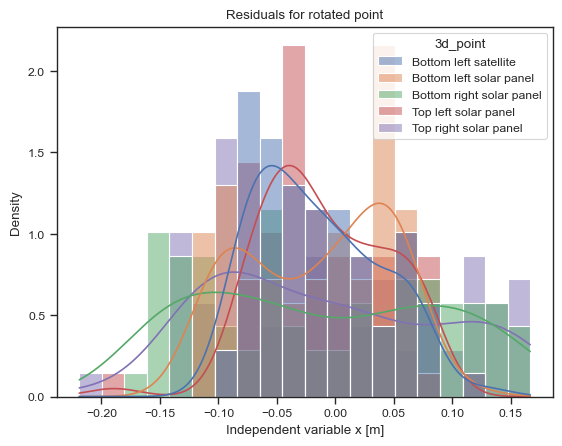

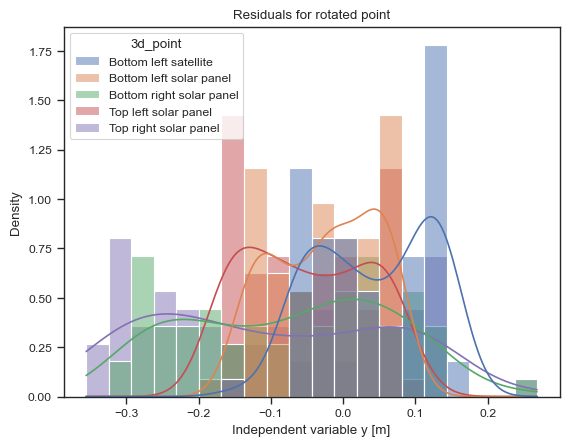

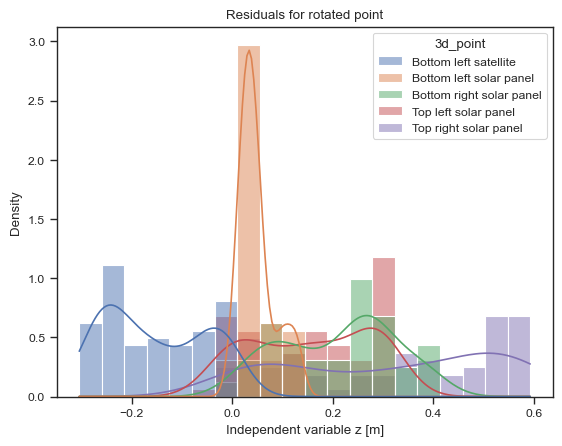

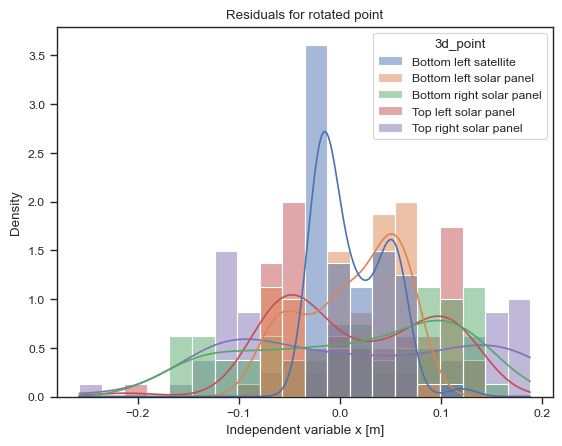

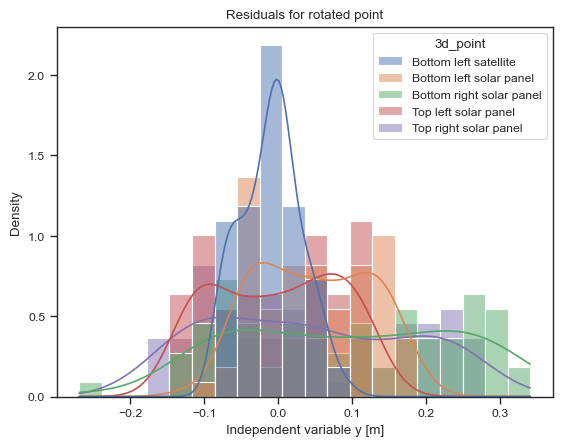

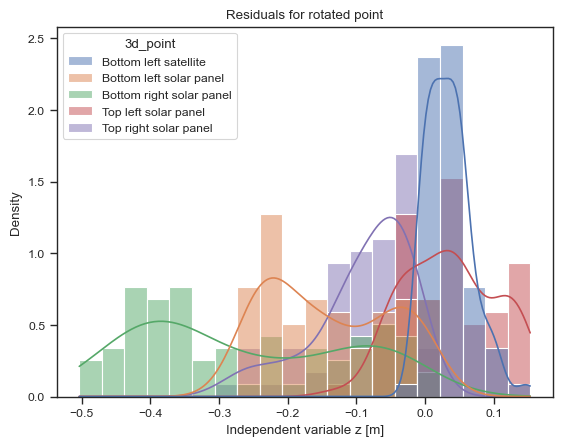

In [2591]:
for var in ['x', 'y', 'z']:
    g = sns.histplot(data=df_rotated_points_all, x='residual_' + var, hue='3d_point', kde=True, stat='density',
                     bins=20);
    # mean = df_rotated_points_all['residual_' + var].mean()
    # plt.axvline(mean, color='red', linestyle='dashed', linewidth=1)
    g.set_title('Residuals for rotated point')
    g.set(xlabel='Independent variable ' + var + ' [m]')
    plt.savefig(folder + "/plots/" + var + '_residuals.png')
    plt.show()